In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from fuzzywuzzy import process

In [ ]:
# getting the first page of 200 movies
page = requests.get("https://editorial.rottentomatoes.com/guide/best-movies-of-all-time/")
# converting page into readable text file
soup = BeautifulSoup(page.content, "html.parser")
# umcomment to see html as text file
# print(soup.prettify())

<!DOCTYPE html>
<html class="hitim" lang="en-US">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <!-- OneTrust Cookies Consent Notice start for rottentomatoes.com -->
  <script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() { }
  </script>
  <!-- OneTrust Cookies Consent Notice end for rottentomatoes.com -->
  <!-- OneTrust IAB US Privacy (USP) -->
  <script ccpa-opt-out-geo="US" ccpa-opt-out-ids="USP" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
  </script>
  <!-- OneTrust 

In [28]:
# creating an empty list to store individual movies
movies = []
titles_ratings = {}
# Loop through each movie row
for row in soup.find_all('tr'):
    movie_data = row.find('p', class_='apple-news-link-wrap movie')
    
    if movie_data:
        title = movie_data.find('a', class_='title').get_text(strip=True)
        score = int(movie_data.find('span', class_='score').strong.get_text(strip=True).strip("%"))
        year = movie_data.find('span', class_='year').get_text(strip=True)
        title = title + " " + year
        # Append data to the list
        titles_ratings[title] = {"rating": score}

# Print results
print(titles_ratings)

{'L.A. Confidential (1997)': {'rating': 99}, 'The Godfather (1972)': {'rating': 97}, 'Casablanca (1942)': {'rating': 99}, 'Seven Samurai (1954)': {'rating': 100}, 'Parasite (2019)': {'rating': 99}, "Schindler's List (1993)": {'rating': 98}, 'Top Gun: Maverick (2022)': {'rating': 96}, 'Toy Story 2 (1999)': {'rating': 100}, 'Chinatown (1974)': {'rating': 98}, 'On the Waterfront (1954)': {'rating': 99}, 'The Battle of Algiers (1966)': {'rating': 99}, 'Toy Story (1995)': {'rating': 100}, 'Rear Window (1954)': {'rating': 98}, 'Modern Times (1936)': {'rating': 98}, 'How to Train Your Dragon (2010)': {'rating': 99}, 'All About Eve (1950)': {'rating': 99}, 'Spirited Away (2001)': {'rating': 96}, 'Up (2009)': {'rating': 98}, 'The Third Man (1949)': {'rating': 99}, 'Spotlight (2015)': {'rating': 97}, 'Spider-Man: Into the Spider-Verse (2018)': {'rating': 97}, 'The Philadelphia Story (1940)': {'rating': 100}, 'Finding Nemo (2003)': {'rating': 99}, "Singin' in the Rain (1952)": {'rating': 100}, '1

In [29]:
# storing movie titles and their ratings as a hashmap in a new file
with open('title_ratings.txt', 'w') as title_ratings: 
     title_ratings.write(json.dumps(titles_ratings))

Your favorite movie: Avengers: Endgame
Your exploration percentage: 75

Recommended Movies:
- Jaws (97)
- Moana (95)
- Beauty and the Beast (95)
- The Lion King (93)
- Oppenheimer (93)


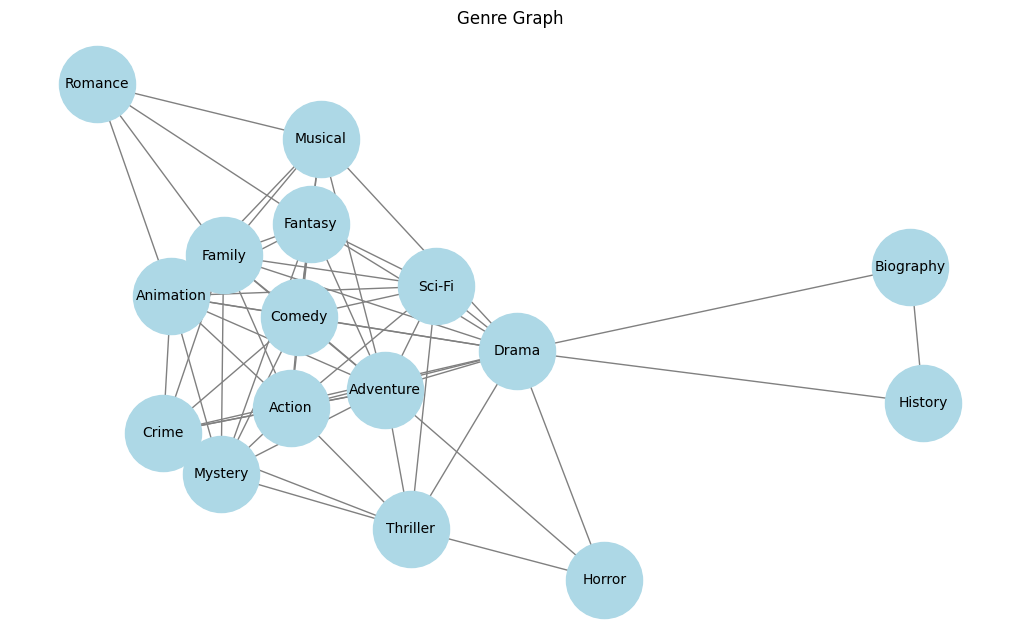

In [ ]:
import recommendation_functions as rec

# Sample movie database
with open("ratings_genres.txt", "r") as rating_genre:
    movie_db = json.load(rating_genre)

# Taking user input
fav_movie = input("Enter your favorite movie: ")
# Use the fuzzywuzzy library to pick out the closest movie title. Grabs best match and string relating to it
fuzzed_fav_movie = process.extract(fav_movie, movie_db.keys())[0][0]
try:
    exploration_pct = int(input("Enter exploration percentage (0-100): "))
    if exploration_pct < 0 or exploration_pct > 100:
        raise ValueError("Exploration percentage must be between 0 and 100.")
    
    recommendations = rec.get_movie_recommendations(movie_db, fuzzed_fav_movie, exploration_pct)
    
    if recommendations:
        print(f"Your favorite movie: {fuzzed_fav_movie}\nYour exploration percentage: {exploration_pct}")
        print("\nRecommended Movies:")
        for movie, rating in recommendations:
            print(f"- {movie} ({rating})")
    else:
        print("No recommendations available.")

    # Display genre graph
    genre_graph = rec.build_genre_graph(movie_db)
    rec.display_genre_graph(genre_graph)

except ValueError as e:
    print(f"Invalid input: {e}")
